## Neural Network Implementation

(1797, 64)


<Figure size 432x288 with 0 Axes>

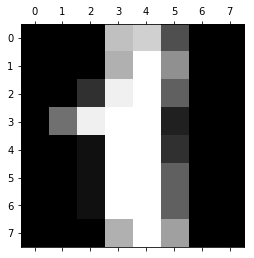

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()



The code above prints (1797, 64) to show the shape of input data matrix and the pixelated digit “1” in the image above.  The code we are going to write in this neural networks tutorial will try and estimate the digits that these pixels represent (using neural networks of course). First things first, we need to get the input data in shape. To do so, we need to do two things:

    Scale the data
    Split the data into test and train sets


<h2>Scaling data</h2>




Why do we need to scale the input data?  First, have a look at one of the dataset pixel representations:

In [16]:
digits.data[0,:]
Out[2]:array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13., 15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,0.,1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,0.,   0.,   0.,   6.,  13.,  10.,   0.,  0.,  0.])

SyntaxError: invalid syntax (<ipython-input-16-f6a1ee5621dc>, line 2)

Notice that the input data ranges from 0 up to 15?  It’s standard practice to scale the input data so that it all fits mostly between either 0 to 1 or with a small range centred around 0 i.e. -1 to 1.  Why?  Well, it can help the convergence of the neural network and is especially important if we are combining different data types.  Thankfully, this is easily done using sci-kit learn:

In [21]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]
Out[3]:array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

SyntaxError: invalid syntax (<ipython-input-21-164756e4cd41>, line 5)

The scikit learn standard scaler by default normalises the data by subtracting the mean and dividing by the standard deviation.  As can be observed, most of the data points are centered around zero and contained within -2 and 2.  This is a good starting point.  There is no real need to scale the output data y.

<h2> Creating test and training datasets</h2>

<p>In machine learning, there is a phenomenon called “overfitting”. This occurs when models, during training, become too complex – they become really well adapted to predict the training data, but when they are asked to predict something based on new data that they haven’t “seen” before, they perform poorly. In other words, the models don’t generalise very well. To make sure that we are not creating models which are too complex, it is common practice to split the dataset into a training set and a test set. The training set is, obviously, the data that the model will be trained on, and the test set is the data that the model will be tested on after it has been trained. The amount of training data is always more numerous than the testing data, and is usually between 60-80% of the total dataset.</p>
<br>
<p>Again, scikit learn makes this splitting of the data into training and testing sets easy:</p>

In [11]:

from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

NameError: name 'X' is not defined

In this case, we’ve made the test set to be 40% of the total data, leaving 60% to train with. The train_test_split function in scikit learn pushes the data randomly into the different datasets – in other words, it doesn’t take the first 60% of rows as the training set and the second 40% of rows as the test set. This avoids data collection artefacts from degrading the performance of the model.

<h3>Setting up the output layer</h3>

As you would have been able to gather, we need the output layer to predict whether the digit represented by the input pixels is between 0 and 9. Therefore, a sensible neural network architecture would be to have an output layer of 10 nodes, with each of these nodes representing a digit from 0 to 9. We want to train the network so that when, say, an image of the digit “5” is presented to the neural network, the node in the output layer representing 5 has the highest value. Ideally, we would want to see an output looking like this: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. However, in reality, we can settle for something like this: [0.01, 0.1, 0.2, 0.05, 0.3, 0.8, 0.4, 0.03, 0.25, 0.02]. In this case, we can take the maximum index of the output array and call that our predicted digit.

For the MNIST data supplied in the scikit learn dataset, the “targets” or the classification of the handwritten digits is in the form of a single number. We need to convert that single number into a vector so that it lines up with our 10 node output layer. In other words, if the target value in the dataset is “1” we want to convert it into the vector: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]. The code below does just that:

In [24]:
import numpy as np
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]
Out[8]:
(1, array([ 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

SyntaxError: invalid syntax (<ipython-input-24-aaad0cfdf395>, line 10)

As can be observed above, the MNIST target (1) has been converted into the vector [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], which is what we want.

<h2>Creating the neural network</h2>

The next step is to specify the structure of the neural network. For the input layer, we know we need 64 nodes to cover the 64 pixels in the image. As discussed, we need 10 output layer nodes to predict the digits. We’ll also need a hidden layer in our network to allow for the complexity of the task. Usually, the number of hidden layer nodes is somewhere between the number of input layers and the number of output layers. Let’s define a simple Python list that designates the structure of our network:

In [26]:
nn_structure = [64, 30, 10]

We’ll use sigmoid activation functions again, so let’s setup the sigmoid function and its derivative:

In [27]:
def f(x):
    return 1 / (1 + np.exp(-x))
def f_deriv(x):
    return f(x) * (1 - f(x))

Ok, so we now have an idea of what our neural network will look like. How do we train it? Remember the algorithm from Section 4.9 , which we’ll repeat here for ease of access and review:

Randomly initialise the weights for each layer W(l)

While iterations < iteration limit:
1. Set ΔW and Δb to zero
2. For samples 1 to m:
a. Perform a feed foward pass through all the nl layers. Store the activation function outputs h(l)
b. Calculate the δ(nl) value for the output layer
c. Use backpropagation to calculate the δ(l) values for layers 2 to nl−1
d. Update the ΔW(l) and Δb(l) for each layer
3. Perform a gradient descent step using:

\begin{align} 
W^{(l)} = W^{(l)} – \alpha \left[\frac{1}{m} \Delta W^{(l)} \right]
\end{align}

So the first step is to initialise the weights for each layer. To make it easy to organise the various layers, we’ll use Python dictionary objects (initialised by {}). Finally, the weights have to be initialised with random values – this is to ensure that the neural network will converge correctly during training. We use the numpy library random_sample function to do this. The weight initialisation code is shown below:

In [35]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b



The next step is to set the mean accumulation values ΔW
and Δb to zero (they need to be the same size as the weight and bias matrices):

In [36]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

If we now step into the gradient descent loop, the first step is to perform a feed forward pass through the networkm

In [37]:
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if it is the first layer, then the input into the weights is x, otherwise, 
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)  
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l)) 
    return h, z

Finally, we have to then calculate the output layer delta δ(nl) and any hidden layer delta values δ(l) to perform the backpropagation pass:

In [38]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

Now we can put all the steps together into the final function:

In [39]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) 
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

The function above deserves a bit of explanation. First, we aren’t setting a termination of the gradient descent process based on some change or precision of the cost function. Rather, we are just running it for a set number of iterations (3,000 in this case) and we’ll monitor how the average cost function changes as we progress through the training (avg_cost_func list in the above code). In each iteration of the gradient descent, we cycle through each training sample (range(len(y)) and perform the feed forward pass and then the backpropagation. The backpropagation step is an iteration through the layers starting at the output layer and working backwards – range(len(nn_structure), 0, -1). We calculate the average cost, which we are tracking during the training, at the output layer (l == len(nn_structure)). We also update the mean accumulation values, ΔW and Δb, designated as tri_W and tri_b, for every layer apart from the output layer (there are no weights connecting the output layer to any further layer).